In [1]:
library('tidyverse')
library('rvest')
library('lubridate')
library('scales')
library('ggrepel')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [3]:
df.marathon %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | _race.time_ |
| color | _country.simple_ |
| facet value | _MF_ |

Make note of other aesthetic decisions. 
- What's the y-axis title? *Winning Time*
- Do the two charts share the same x-axis bounds? *no*
- Is there a legend? *no*

Code your version of the chart below.

In [89]:
country_label = data.frame(
    country.simple = c('United States', 'United States',
                       'Kenya', 'Kenya',
                       'Ethiopia',
                       'Japan'),
    display = c('United\nStates', 'United\nStates',
                       'Kenya', 'Kenya',
                       'Ethiopia',
                       'Japan'),
    MF = c('Men\'s', 'Women\'s', 'Men\'s', 'Women\'s', 'Women\'s', 'Men\'s'),
    year = c(1915,2000,2000,2000,2000,1962),
    race.time = c(2.75, 2.5, 2.4, 2.5, 2.5, 2.2)
    )

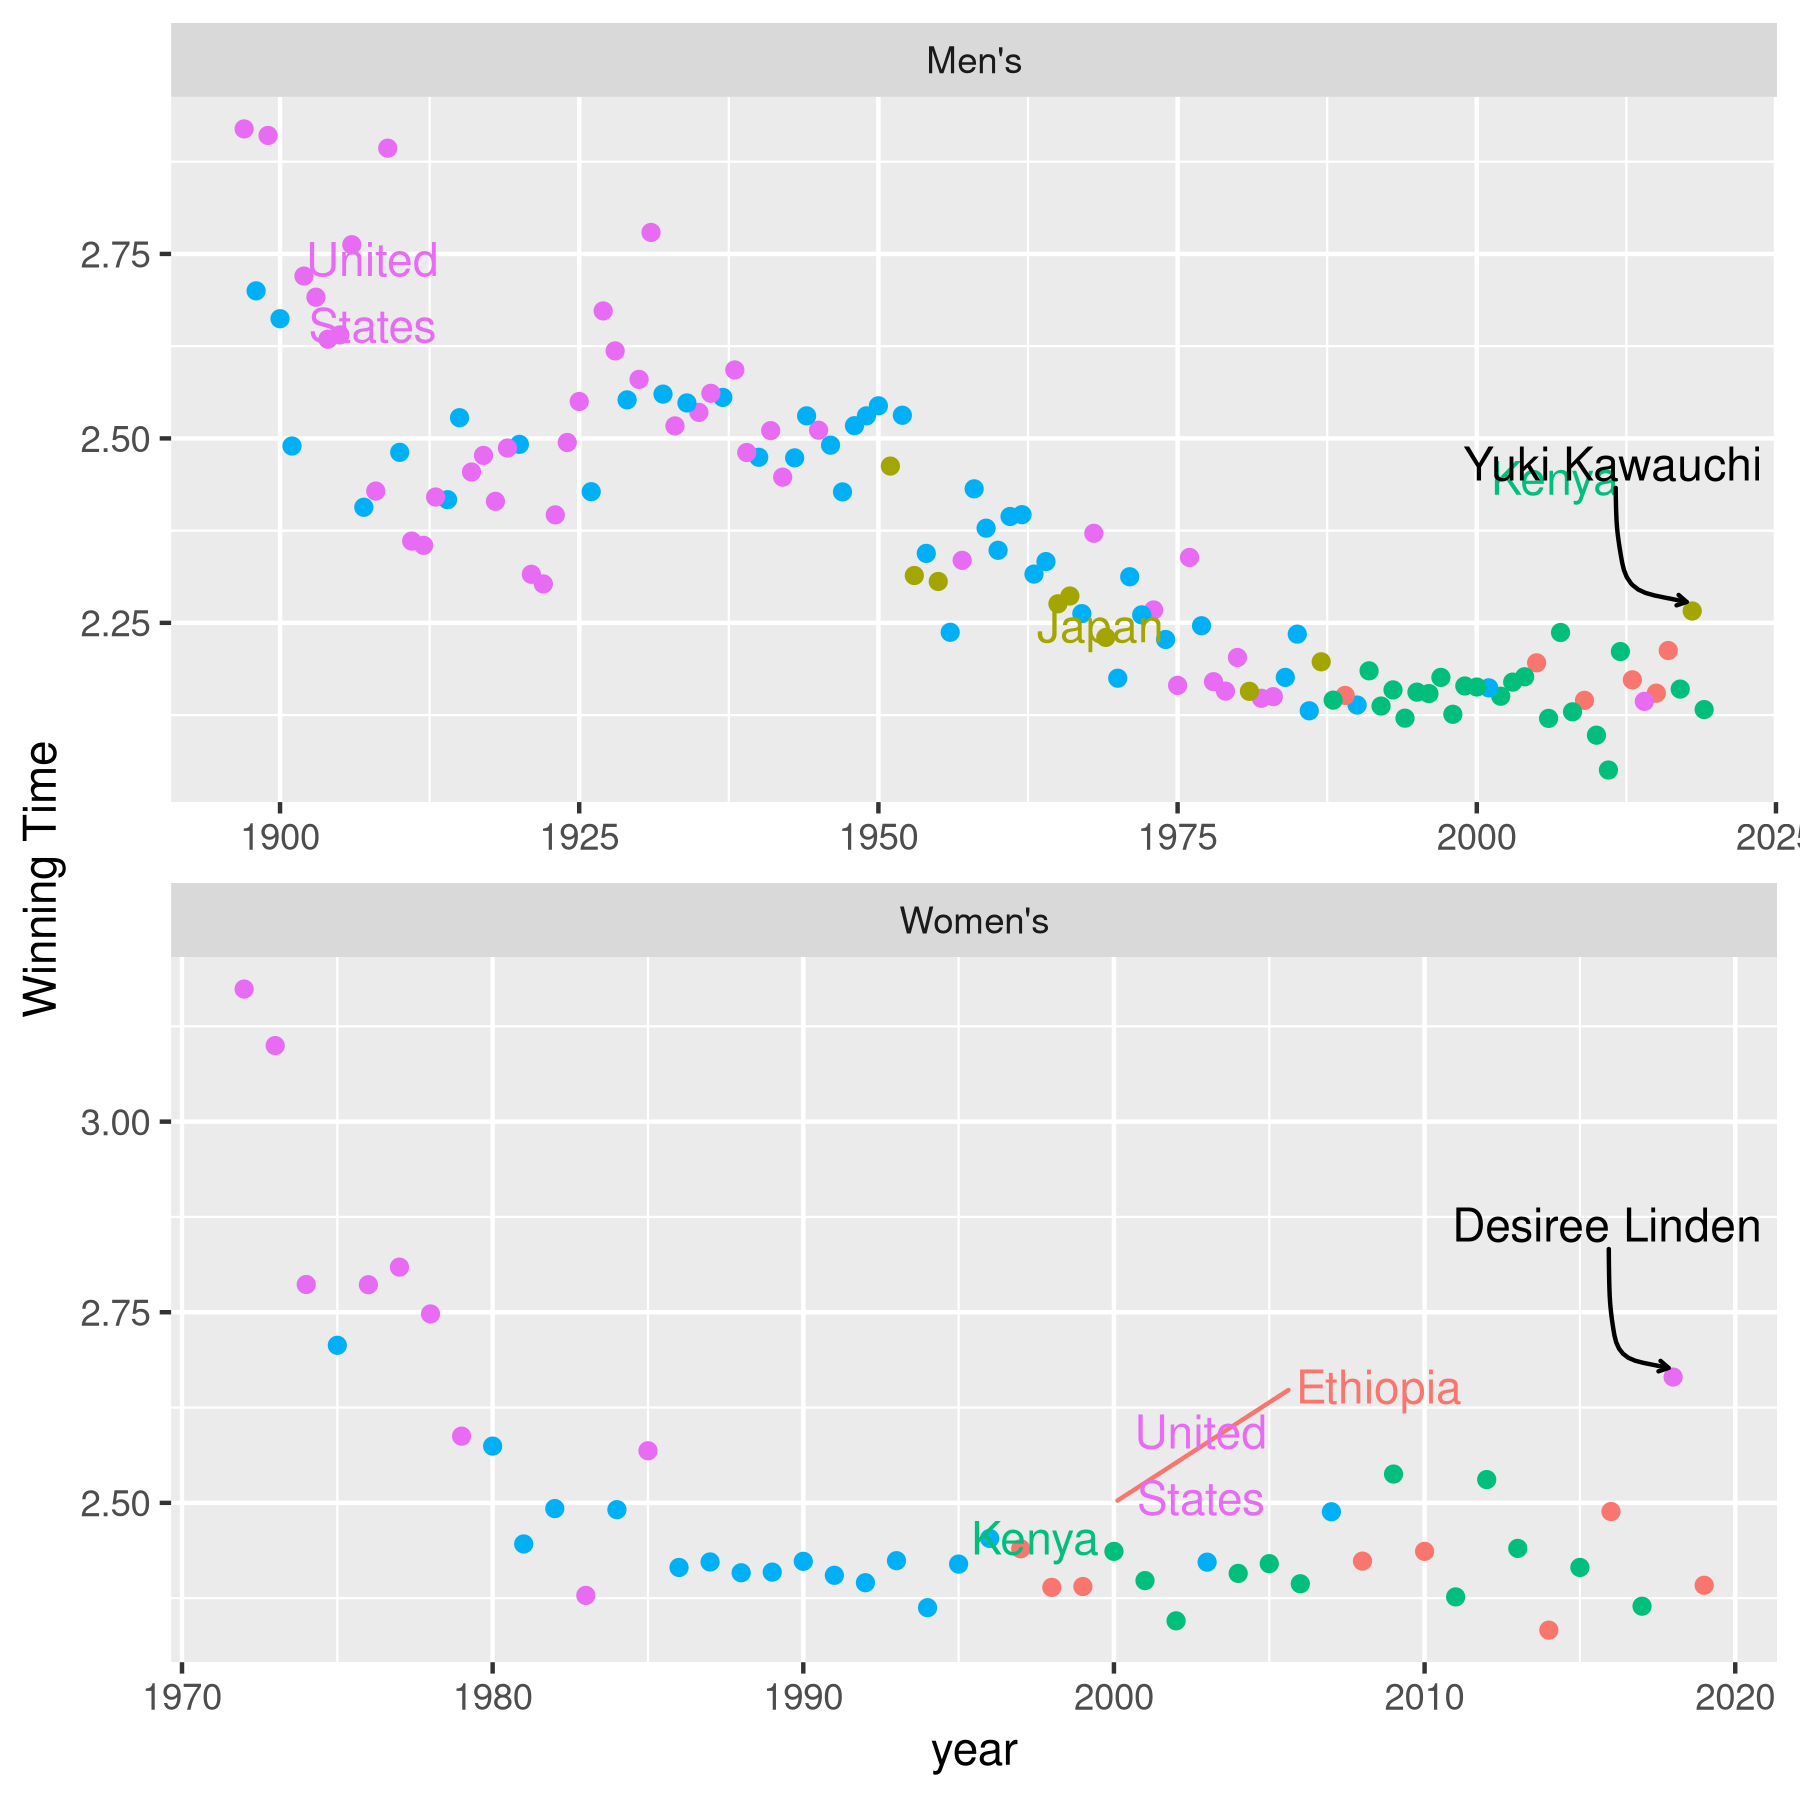

In [90]:
p = ggplot(df.marathon, aes(x = year, y = race.time, color = country.simple, label = name))

p = p + geom_point()


p = p + geom_text_repel(data = country_label,
                        nudge_y = 0,
                        nudge_x = 0,
                        mapping = aes(label = display)
                       )

p = p + geom_text_repel(data = df.marathon %>% filter(year == 2018),
                        nudge_y = .2,
                        nudge_x = -1,
                        segment.curvature = .667,
                        segment.ncp = 1,
                        color = "black",
                        arrow = arrow(length = unit(.015, "npc")),
                        point.padding = .5
                       )


p = p + facet_wrap(~MF, scales = 'free', ncol = 1)

p = p + labs(y = "Winning Time")

# p = p + scale_x_continuous(labels = time)
p = p + theme(legend.position = 'none')
p

In [28]:
?scales

scales-package {scales},R Documentation


What else might you visualize with this data? (e.g. What about totaling the winners from each country?)